In [8]:
import math
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import hcpdatautils as hcp

In [9]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [10]:
data_dir = 'E:\\HCP_data'
results_dir = 'E:\\Ising_model_results_daai'

In [61]:
data_subset = 'training'
threshold_str = 'median'
states_file = os.path.join(results_dir, f'unique_states_group_{data_subset}_threshold_{threshold_str}.pt')
unique_states = torch.load(states_file)
print( 'unique_states size', unique_states.size() )
counts_file = os.path.join(results_dir, f'unique_state_counts_group_{data_subset}_threshold_{threshold_str}.pt')
state_counts = torch.load(counts_file)
print( 'state_counts size', state_counts.size() )

unique_states size torch.Size([360, 3181055])
state_counts size torch.Size([3181055])


In [7]:
print(3181055/3211200)

0.990612543597409


In [169]:
def make_histogram(name:str, values:torch.Tensor):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist( values.flatten().detach().cpu().numpy() )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(name)
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name}')
    plt.show()

In [170]:
def print_stats(name:str, values:torch.Tensor):
    values = values.flatten()
    quantile_cutoffs = torch.tensor([0.025, 0.5, 0.975], dtype=float_type, device=device)
    quantiles = torch.quantile(values, quantile_cutoffs)
    min_val = torch.min(values)
    max_val = torch.max(values)
    print(f'The distribution of {name} values has median {quantiles[1].item():.3g} with 95% CI [{quantiles[0].item():.3g}, {quantiles[2].item():.3g}] and range [{min_val.item():.3g}, {max_val.item():.3g}].')

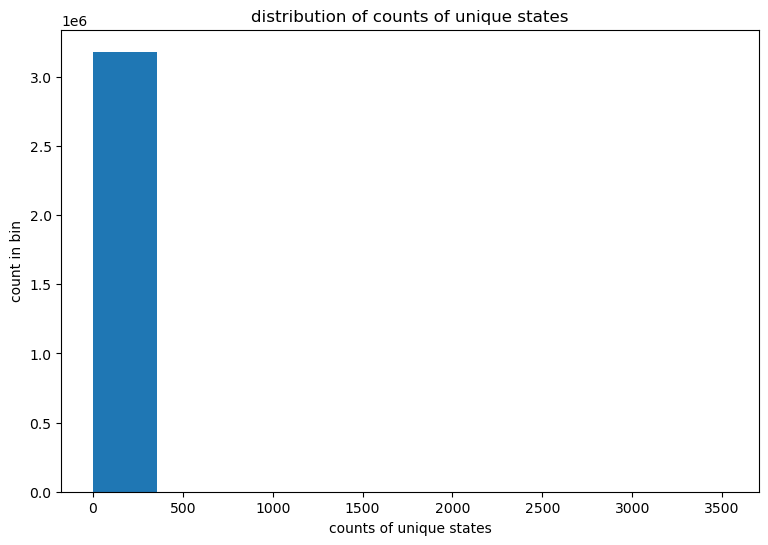

The distribution of counts of unique states values has median 1 with 95% CI [1, 1] and range [1, 3.53e+03].


In [13]:
make_histogram(name='counts of unique states', values=state_counts)
print_stats( name='counts of unique states', values=state_counts.float() )

In [14]:
most_common_state_index = torch.argmax(state_counts)
print(most_common_state_index)
print(state_counts[most_common_state_index])
print(unique_states[:,most_common_state_index])

tensor(2659, device='cuda:0')
tensor(3528, device='cuda:0', dtype=torch.int32)
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,

In [18]:
sorted_counts, sort_indices = torch.sort(state_counts, descending=True)
is_nonsingleton = sorted_counts > 1
print(f'num nonsingleton counts {is_nonsingleton.count_nonzero()}')
print(sorted_counts[is_nonsingleton])

num nonsingleton counts 11296
tensor([3528, 1508,  409,  ...,    2,    2,    2], device='cuda:0',
       dtype=torch.int32)


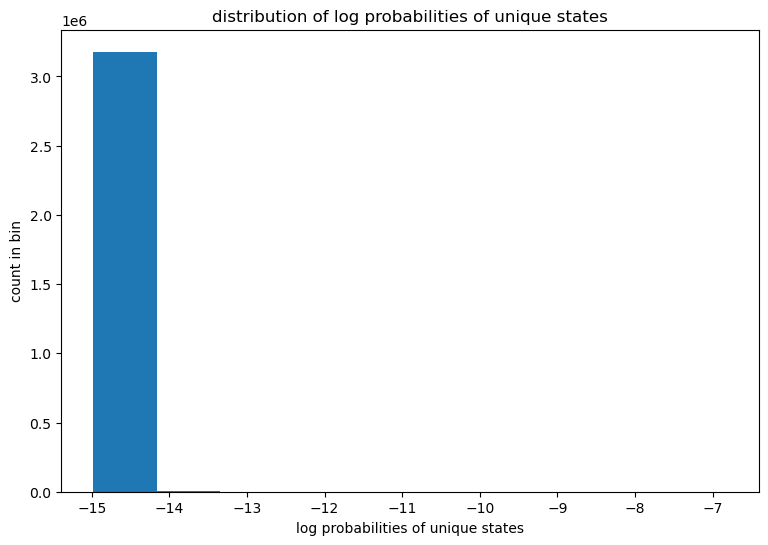

The distribution of log probabilities of unique states values has median -15 with 95% CI [-15, -15] and range [-15, -6.81].


In [19]:
log_probs = torch.log( state_counts.float()/torch.sum(state_counts) )
make_histogram(name='log probabilities of unique states', values=log_probs)
print_stats( name='log probabilities of unique states', values=log_probs )

In [44]:
index = 20
print( sorted_counts[index].item() )
print( unique_states[:,sort_indices[index]] )

99
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fals

torch.Size([2, 3181055])


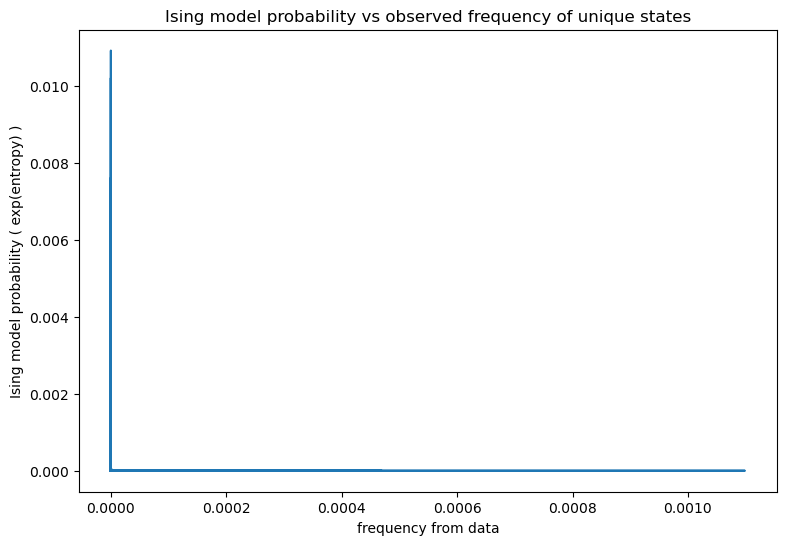

In [53]:
ising_prob_pairs_file = os.path.join(results_dir, 'data_model_probability_pairs_group_training_threshold_median.pt')
ising_prob_pairs = torch.load(ising_prob_pairs_file)
print( ising_prob_pairs.size() )

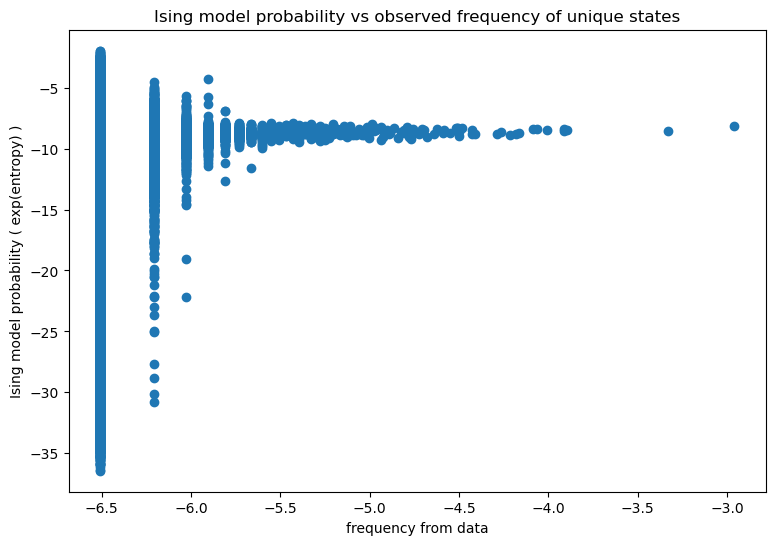

In [55]:
log_ising_prob_pairs = ising_prob_pairs.log10()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.scatter( log_ising_prob_pairs[0,:].detach().cpu().numpy(), log_ising_prob_pairs[1,:].detach().cpu().numpy() )
# axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
axs.set_xlabel('frequency from data')
axs.set_ylabel('Ising model probability ( exp(entropy) )')
axs.set_title(f'Ising model probability vs observed frequency of unique states')
plt.show()

In [56]:
num_nodes = 360
num_params = num_nodes + ( num_nodes*(num_nodes-1) )//2
num_nodes_back = ( math.sqrt(8*num_params+1) - 1 )/2
print(f'num_nodes {num_nodes}, num_params {num_params}, num_nodes from quadratic formula {num_nodes_back}')

num_nodes 360, num_params 64980, num_nodes from quadratic formula 360.0


In [73]:
expected_values_file = os.path.join(results_dir, f'observable_expected_values_group_{data_subset}_threshold_{threshold_str}.pt')
expected_values = torch.load(expected_values_file)
print( expected_values.size() )

torch.Size([64980])


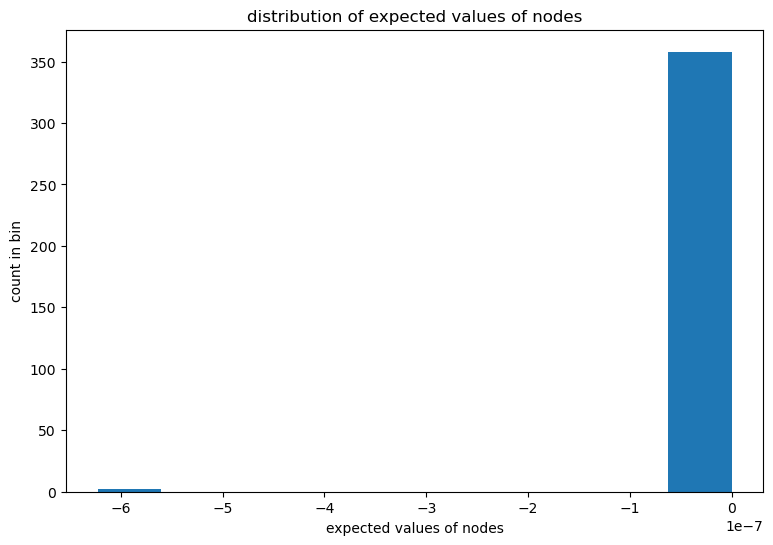

The distribution of expected values of nodes values has median 0 with 95% CI [0, 0] and range [-6.23e-07, 0].


In [74]:
h = expected_values[:num_nodes]
h_name = 'expected values of nodes'
make_histogram(name=h_name, values=h)
print_stats(name=h_name, values=h)

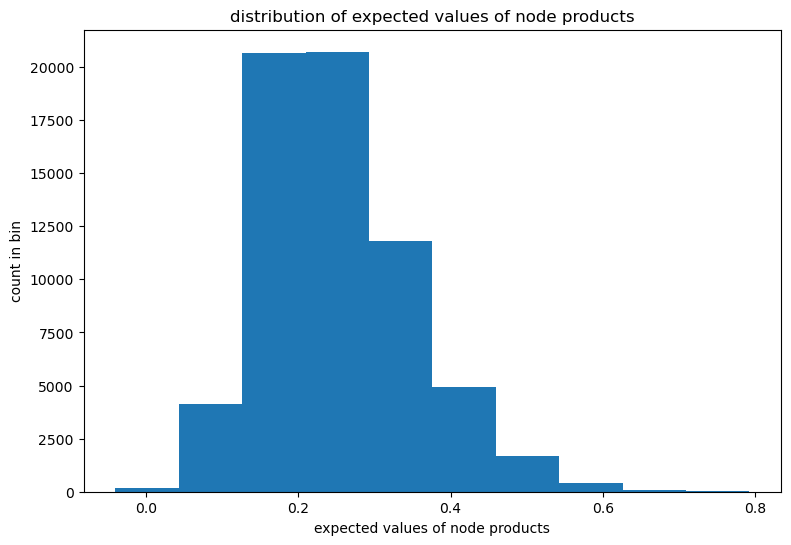

The distribution of expected values of node products values has median 0.235 with 95% CI [0.0973, 0.477] and range [-0.0407, 0.793].


In [75]:
J_triu = expected_values[num_nodes:]
J_triu_name = 'expected values of node products'
make_histogram(name=J_triu_name, values=J_triu)
print_stats(name=J_triu_name, values=J_triu)

In [77]:
subject_list = hcp.load_subject_subset(directory_path=data_dir, subject_subset=data_subset, require_sc=True)
print( len(subject_list) )

669


In [78]:
subject_id = subject_list[0]
rep_string = hcp.time_series_suffixes[0]
data_ts_file = hcp.get_time_series_file_path(directory_path=data_dir, subject_id=subject_id, time_series_suffix=rep_string)
print(data_ts_file)
data_ts = hcp.load_matrix_from_binary(file_path=data_ts_file, dtype=float_type, device=device).transpose(dim0=0, dim1=1)
print( data_ts.size() )
data_ts_binary = 2.0*( data_ts > torch.median(data_ts, dim=-1, keepdim=True).values ).float() - 1.0

E:\HCP_data\fMRI_ts_binaries\ts_516742_1_LR.bin
torch.Size([360, 1200])


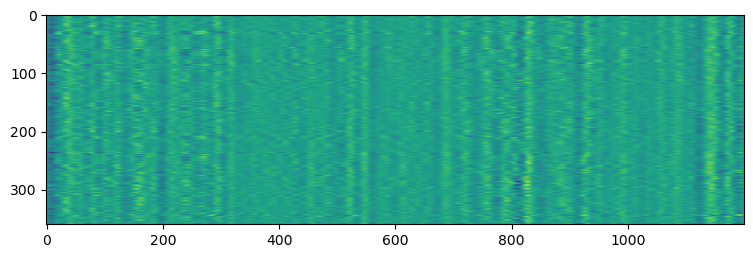

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.imshow( data_ts.detach().cpu().numpy() )

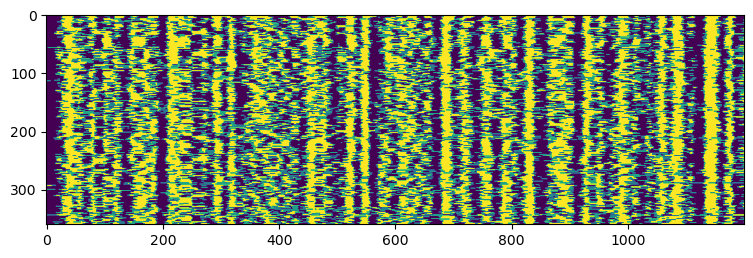

In [81]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.imshow( data_ts_binary.detach().cpu().numpy() )

tensor(66, device='cuda:0')


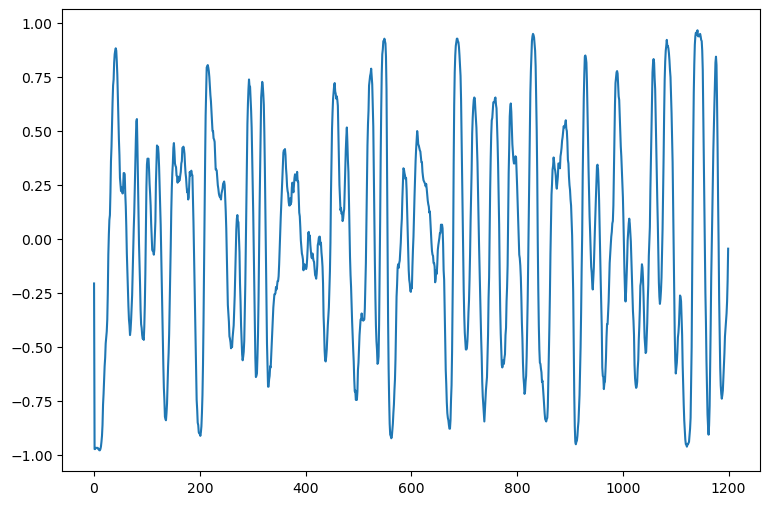

In [89]:
# beta = 0.01
# print( math.exp(-80.1*beta), math.exp(-234*beta) )
# print( -1/math.log2(1 - 1/360) )
mean_time_series = data_ts_binary.mean(dim=0)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot( mean_time_series.detach().cpu().numpy() )
mean_time_series_sign = mean_time_series.sign()
mean_time_series_is_zero_crossing = mean_time_series_sign[:-1] != mean_time_series_sign[1:]
print( mean_time_series_is_zero_crossing.count_nonzero() )

In [92]:
triu_indices = torch.triu_indices(row=360, col=360, offset=1, dtype=int_type, device=device)
triu_rows = triu_indices[0,:]
triu_cols = triu_indices[1,:]
J = torch.zeros( (num_nodes, num_nodes), dtype=float_type, device=device )
J[triu_rows, triu_cols] = J_triu
J = J + J.transpose(dim0=0, dim1=1)
print(J[:5,:5])

tensor([[0.0000, 0.3514, 0.4982, 0.6599, 0.6091],
        [0.3514, 0.0000, 0.4528, 0.4881, 0.4967],
        [0.4982, 0.4528, 0.0000, 0.6488, 0.5701],
        [0.6599, 0.4881, 0.6488, 0.0000, 0.7691],
        [0.6091, 0.4967, 0.5701, 0.7691, 0.0000]], device='cuda:0')


In [93]:
entropies_at_neg_1 = -2.0*( -h + torch.sum(J,dim=1) )# All single regions are -1. All products are +1.
print(entropies_at_neg_1)
median_entropy_at_neg_1 = torch.median(entropies_at_neg_1)
print('median entropy when all nodes are -1', median_entropy_at_neg_1)

tensor([-224.8230, -199.8176, -210.5942, -234.3842, -230.1402, -221.4816,
        -205.5526, -224.7794, -223.7957, -220.8779, -181.9193, -183.7076,
        -205.6282, -167.6552, -143.1915, -199.0083, -199.2016, -224.9881,
        -198.5218, -192.2478, -191.3580, -202.2112, -195.6940, -205.5008,
        -189.7904, -161.6155, -214.5035, -214.4232, -171.4117, -155.3817,
        -168.4479, -151.5741, -131.1594, -153.3283, -149.6738, -194.9737,
        -223.7397, -220.2649, -206.7534, -215.6136, -205.4485, -203.4038,
        -211.9572, -193.4684, -194.2496, -178.4838, -208.0085, -205.0226,
        -201.2562, -185.4467, -219.4622, -226.6628, -227.2983, -198.3927,
        -211.8683, -181.0929, -191.9780, -136.4763, -188.1938, -197.2588,
        -148.4367, -172.3899, -173.6727, -149.2919, -152.5543, -159.5985,
        -172.6412, -181.0747, -174.2858, -155.7119, -172.7715, -164.0613,
        -176.5627, -155.4180, -162.0562, -154.2844, -148.7637, -171.0840,
        -182.3920, -153.3468, -179.200

In [94]:
beta = math.log(0.45539)/-182.1763
print(beta)

0.00431780140617196


In [97]:
beta_test_ts_file = os.path.join(results_dir, f'time_series_beta_test_from_expected_group_{data_subset}_threshold_{threshold_str}_parallel_10_updates_1_sim_length_1200_learning_rate_0.pt')
beta_test_ts = torch.load(beta_test_ts_file)
print( beta_test_ts.size() )

torch.Size([10, 360, 1200])


In [143]:
beta = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
mean_beta_test_ts = beta_test_ts.mean(dim=1)
mean_beta_test_ts_sign = mean_beta_test_ts.sign()
mean_beta_test_ts_is_zero_crossing = mean_beta_test_ts_sign[:,:-1] != mean_beta_test_ts_sign[:,1:]
mean_beta_test_ts_num_zero_crossings = mean_beta_test_ts_is_zero_crossing.count_nonzero(dim=-1)
print(mean_beta_test_ts_num_zero_crossings)

tensor([   0,    0,    0,    0,  415,  930, 1148, 1142, 1157, 1199],
       device='cuda:0')


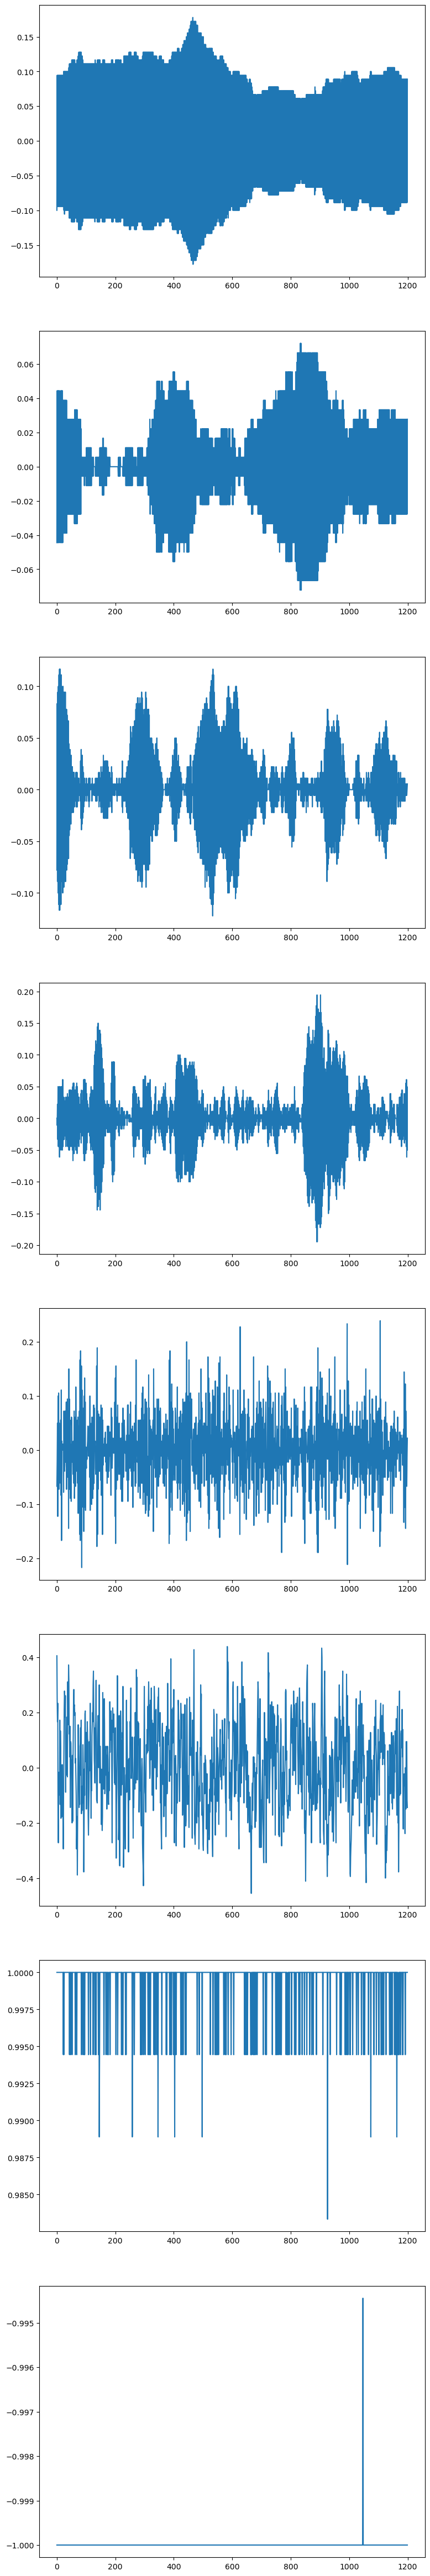

In [132]:
selected_indices = [9, 8, 7, 6, 5, 4, 3, 2]
num_plots = len(selected_indices)
fig, axs = plt.subplots(nrows=num_plots, ncols=1, figsize=(9, 60))
for beta_index_index in range(num_plots):
    beta_index = selected_indices[beta_index_index]
    axs[beta_index_index].plot( mean_beta_test_ts[beta_index,:].detach().cpu().numpy(), label=f'beta={beta[beta_index]:.3g}' )
# axs.legend()
# axs.set_xlabel('time step')
# axs.set_ylabel('mean of region states')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
plt.show()

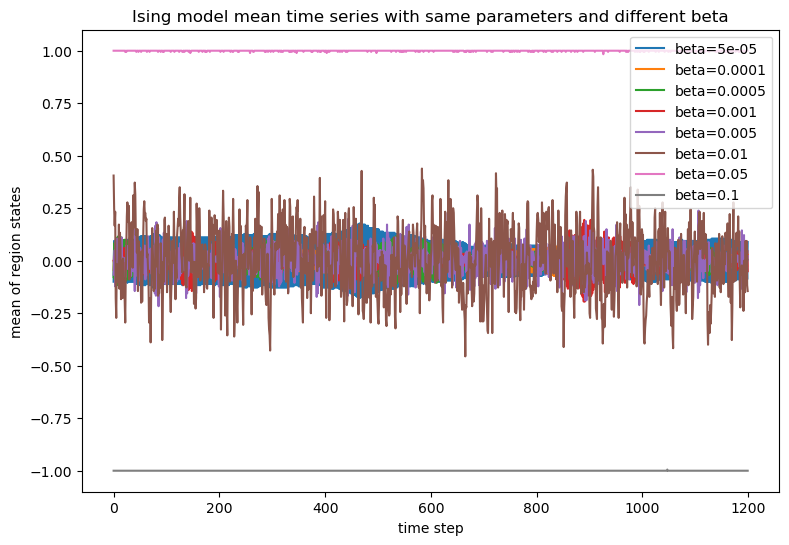

In [134]:
selected_indices = [9, 8, 7, 6, 5, 4, 3, 2]
num_plots = len(selected_indices)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
for beta_index_index in range(num_plots):
    beta_index = selected_indices[beta_index_index]
    axs.plot( mean_beta_test_ts[beta_index,:].detach().cpu().numpy(), label=f'beta={beta[beta_index]:.3g}' )
axs.legend()
axs.set_xlabel('time step')
axs.set_ylabel('mean of region states')
axs.set_title(f'Ising model mean time series with same parameters and different beta')
plt.show()

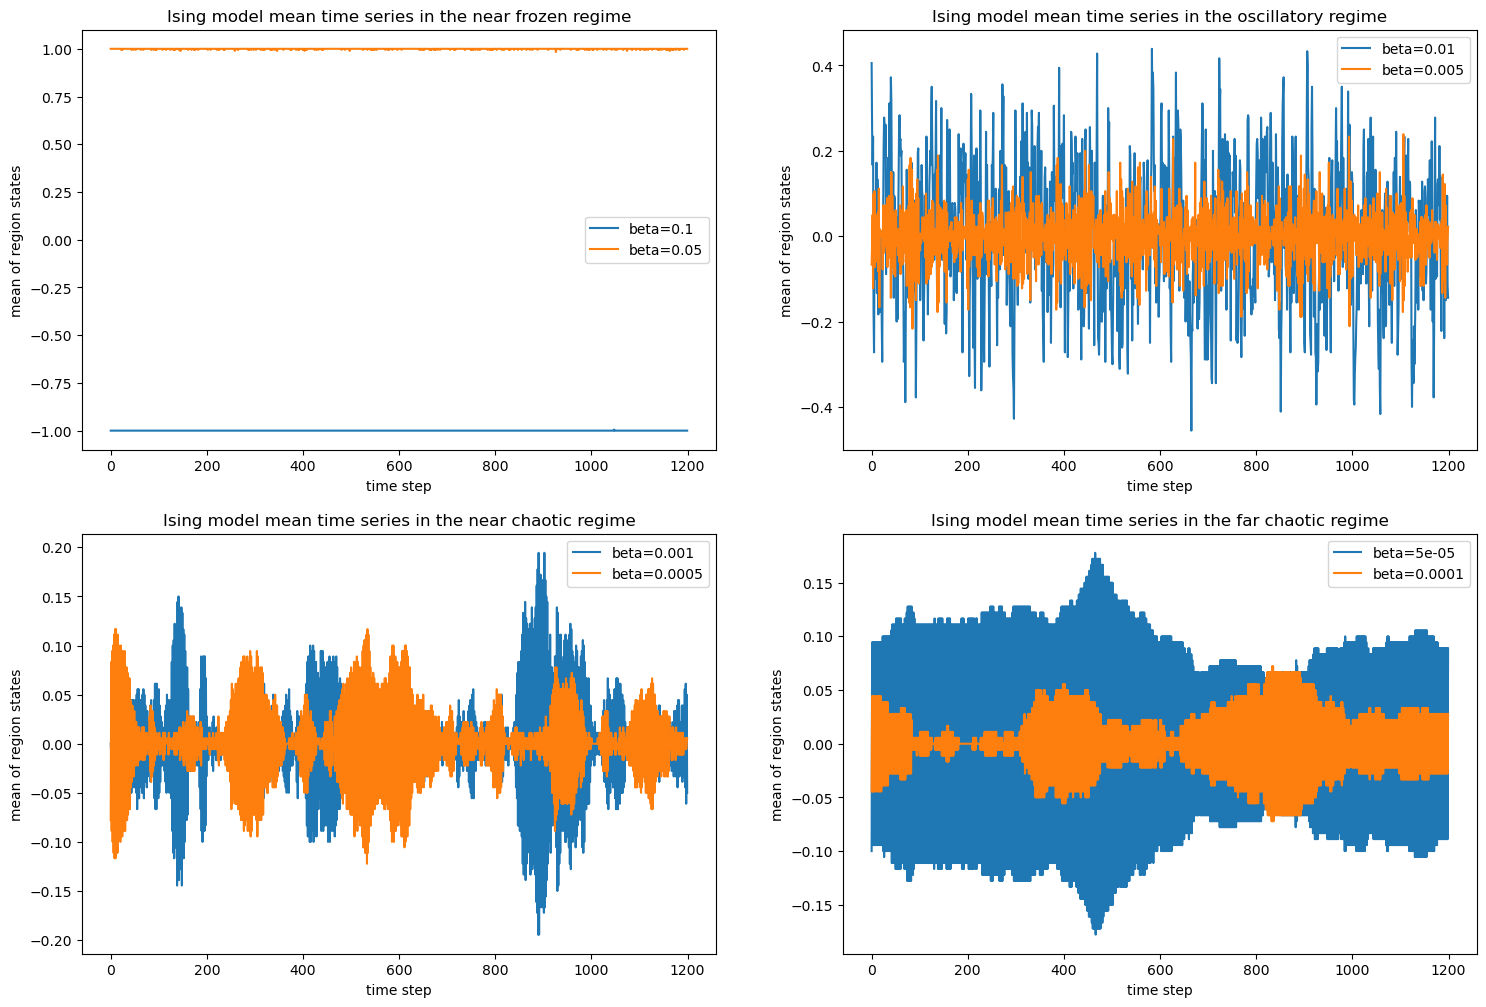

In [138]:
fig, axs = plt.subplots( nrows=2, ncols=2, figsize=(18, 12) )

plot_row = 0
plot_col = 0
for beta_index in [2, 3]:
    axs[plot_row,plot_col].plot( mean_beta_test_ts[beta_index,:].detach().cpu().numpy(), label=f'beta={beta[beta_index]:.3g}' )
axs[plot_row,plot_col].legend()
axs[plot_row,plot_col].set_xlabel('time step')
axs[plot_row,plot_col].set_ylabel('mean of region states')
axs[plot_row,plot_col].set_title(f'Ising model mean time series in the near frozen regime')

plot_row = 0
plot_col = 1
for beta_index in [4, 5]:
    axs[plot_row,plot_col].plot( mean_beta_test_ts[beta_index,:].detach().cpu().numpy(), label=f'beta={beta[beta_index]:.3g}' )
axs[plot_row,plot_col].legend()
axs[plot_row,plot_col].set_xlabel('time step')
axs[plot_row,plot_col].set_ylabel('mean of region states')
axs[plot_row,plot_col].set_title(f'Ising model mean time series in the oscillatory regime')

plot_row = 1
plot_col = 0
for beta_index in [6, 7]:
    axs[plot_row,plot_col].plot( mean_beta_test_ts[beta_index,:].detach().cpu().numpy(), label=f'beta={beta[beta_index]:.3g}' )
axs[plot_row,plot_col].legend()
axs[plot_row,plot_col].set_xlabel('time step')
axs[plot_row,plot_col].set_ylabel('mean of region states')
axs[plot_row,plot_col].set_title(f'Ising model mean time series in the near chaotic regime')

plot_row = 1
plot_col = 1
for beta_index in [9, 8]:
    axs[plot_row,plot_col].plot( mean_beta_test_ts[beta_index,:].detach().cpu().numpy(), label=f'beta={beta[beta_index]:.3g}' )
axs[plot_row,plot_col].legend()
axs[plot_row,plot_col].set_xlabel('time step')
axs[plot_row,plot_col].set_ylabel('mean of region states')
axs[plot_row,plot_col].set_title(f'Ising model mean time series in the far chaotic regime')

plt.show()

In [140]:
beta_test_ts_file_2 = os.path.join(results_dir, f'second_time_series_beta_test_from_expected_group_{data_subset}_threshold_{threshold_str}_parallel_10_updates_1_sim_length_12000_learning_rate_0.pt')
beta_test_ts_2 = torch.load(beta_test_ts_file_2)
print( beta_test_ts_2.size() )

torch.Size([10, 360, 12000])


In [142]:
beta_2 = [0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005]
mean_beta_test_ts_2 = beta_test_ts_2.mean(dim=1)
mean_beta_test_ts_sign_2 = mean_beta_test_ts_2.sign()
mean_beta_test_ts_is_zero_crossing_2 = mean_beta_test_ts_sign_2[:,:-1] != mean_beta_test_ts_sign_2[:,1:]
mean_beta_test_ts_num_zero_crossings_2 = mean_beta_test_ts_is_zero_crossing_2.count_nonzero(dim=-1)
print(mean_beta_test_ts_num_zero_crossings_2)

tensor([   0,    0,    0,    0, 4102, 5776, 7016, 7895, 8698, 9516],
       device='cuda:0')


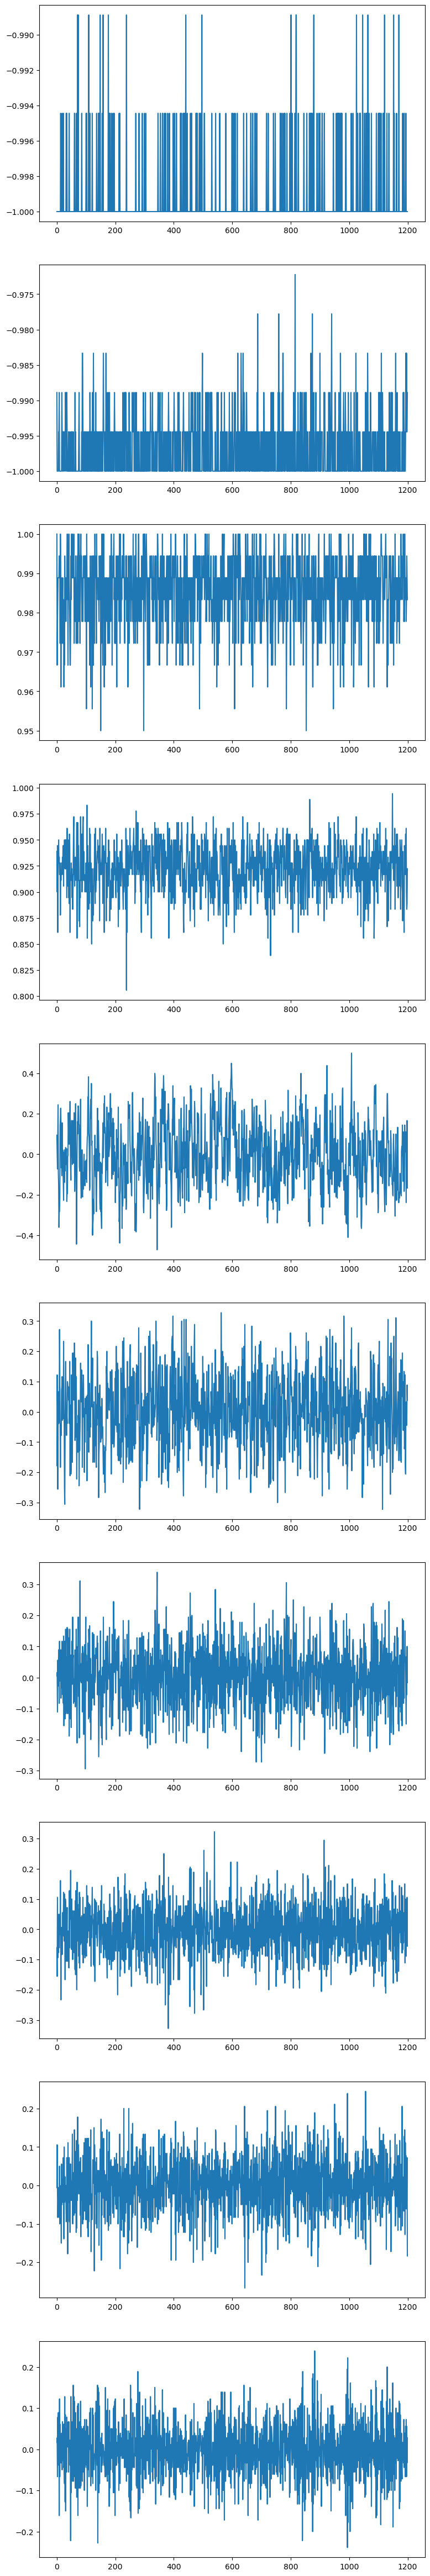

In [145]:
num_betas_2 = len(beta_2)
fig, axs = plt.subplots(nrows=num_betas_2, ncols=1, figsize=(9, 60))
for beta_index in range(num_betas_2):
    axs[beta_index].plot( mean_beta_test_ts_2[beta_index,:1200].detach().cpu().numpy(), label=f'beta={beta_2[beta_index]:.3g}' )
# axs.legend()
# axs.set_xlabel('time step')
# axs.set_ylabel('mean of region states')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
plt.show()

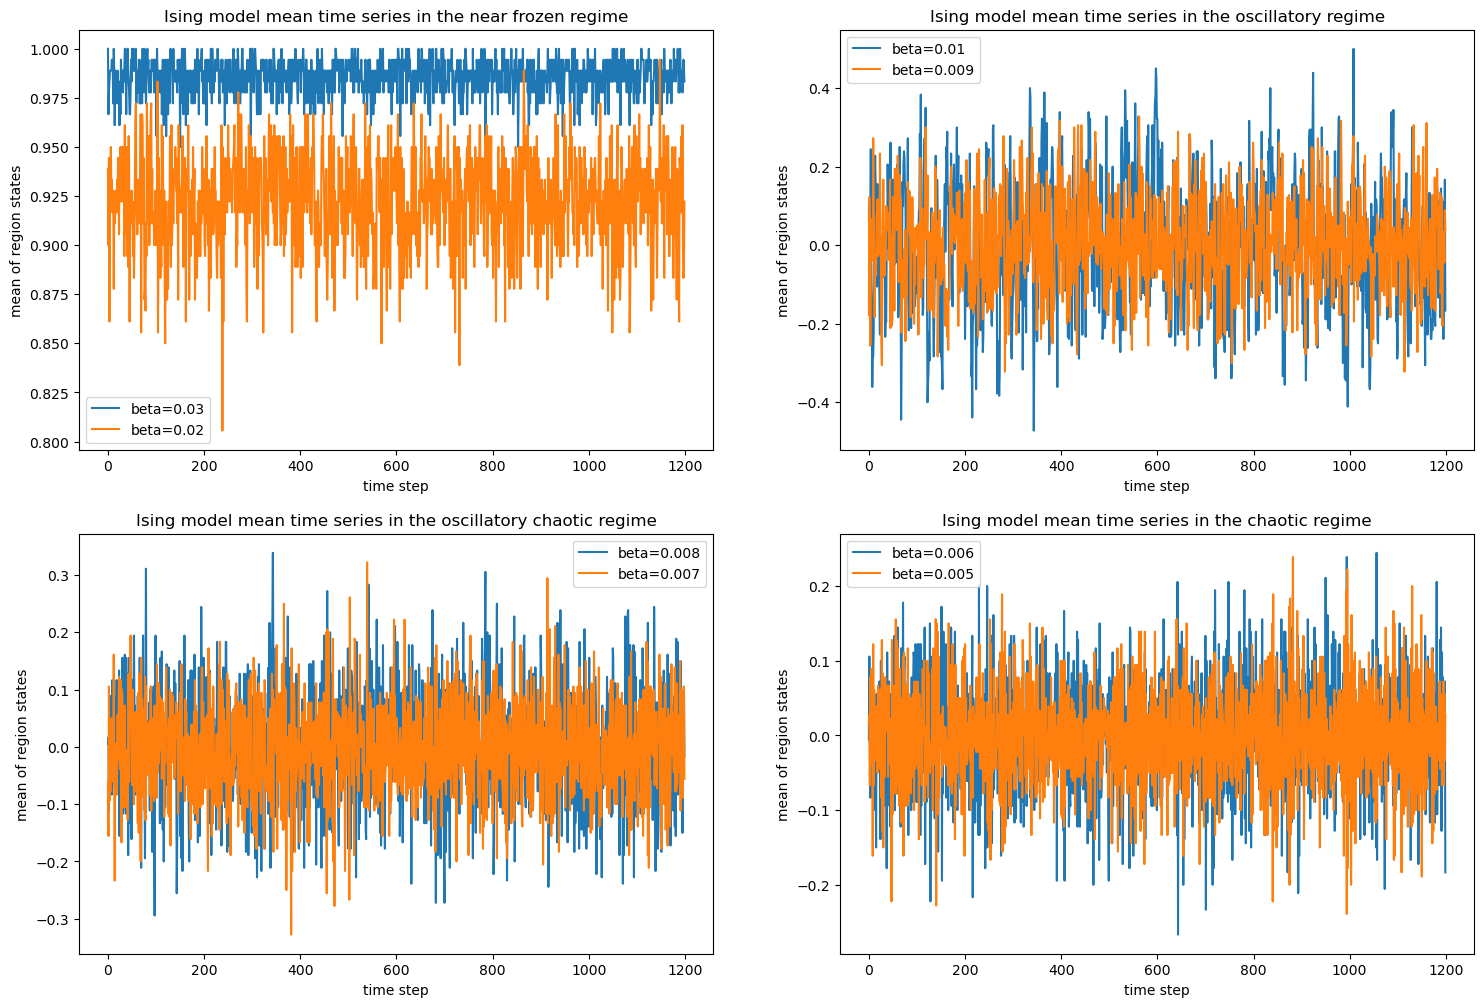

In [146]:
fig, axs = plt.subplots( nrows=2, ncols=2, figsize=(18, 12) )

num_time_points_to_plot = 1200

rows = [0, 0, 1, 1]
cols = [0, 1, 0, 1]
beta_index_pairs = [[2, 3], [4, 5], [6, 7], [8, 9]]
regime_names = ['near frozen', 'oscillatory', 'oscillatory chaotic', 'chaotic']
for plot_row, plot_col, beta_index_pair, regime_name in zip(rows, cols, beta_index_pairs, regime_names):
    for beta_index in beta_index_pair:
        axs[plot_row,plot_col].plot( mean_beta_test_ts_2[beta_index,:num_time_points_to_plot].detach().cpu().numpy(), label=f'beta={beta_2[beta_index]:.3g}' )
    axs[plot_row,plot_col].legend()
    axs[plot_row,plot_col].set_xlabel('time step')
    axs[plot_row,plot_col].set_ylabel('mean of region states')
    axs[plot_row,plot_col].set_title(f'Ising model mean time series in the {regime_name} regime')
plt.show()

torch.Size([360, 12000])


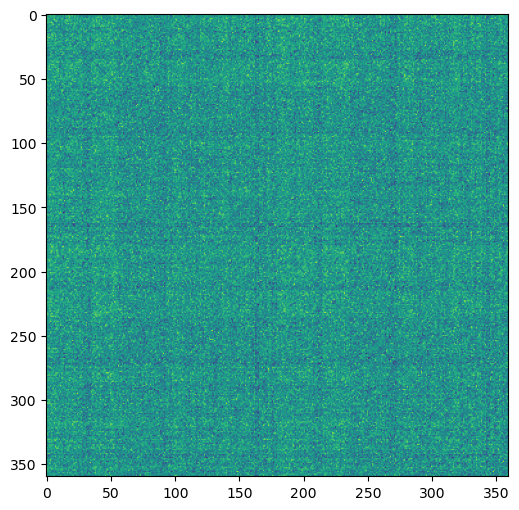

In [150]:
best_ising_ts = beta_test_ts_2[4,:,:]
print( best_ising_ts.size() )
centered_ts = best_ising_ts - torch.mean(best_ising_ts, dim=-1, keepdim=True)
num_time_points_best = centered_ts.size(dim=-1)
ts_std = torch.sqrt(  torch.sum( torch.square(centered_ts), dim=-1 )/(num_time_points_best - 1)  )
best_ising_cov = torch.zeros( (num_nodes, num_nodes), dtype=float_type, device=device )
for t in range(num_time_points_best):
    best_ising_cov += centered_ts[:,None,t] * centered_ts[None,:,t]
best_ising_fc = ( best_ising_cov/num_time_points_best )/( ts_std[:,None] * ts_std[None,:] )
best_ising_fc_no_diag = best_ising_fc - torch.diag_embed( torch.diagonal(best_ising_fc) )
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.imshow( best_ising_fc_no_diag.detach().cpu().numpy() )

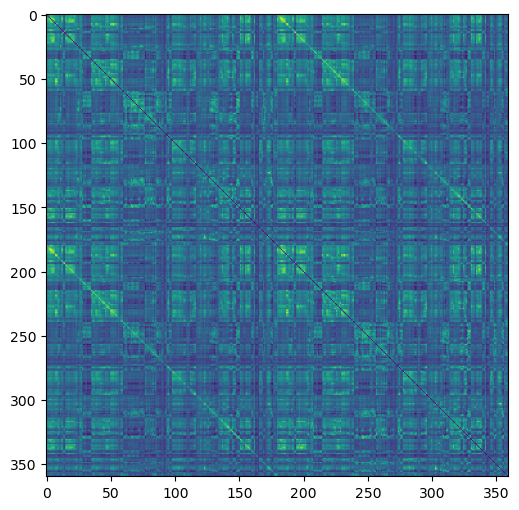

In [151]:
triu_indices = torch.triu_indices(row=num_nodes, col=num_nodes, offset=1, dtype=int_type, device=device)
triu_row = triu_indices[0,:]
triu_col = triu_indices[1,:]
J = torch.zeros( (num_nodes, num_nodes), dtype=float_type, device=device )
J[triu_row, triu_col] = J_triu
J = J + J.transpose(dim0=0, dim1=1)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.imshow( J.detach().cpu().numpy() )

tensor([[1.0000, 0.2004],
        [0.2004, 1.0000]], device='cuda:0')


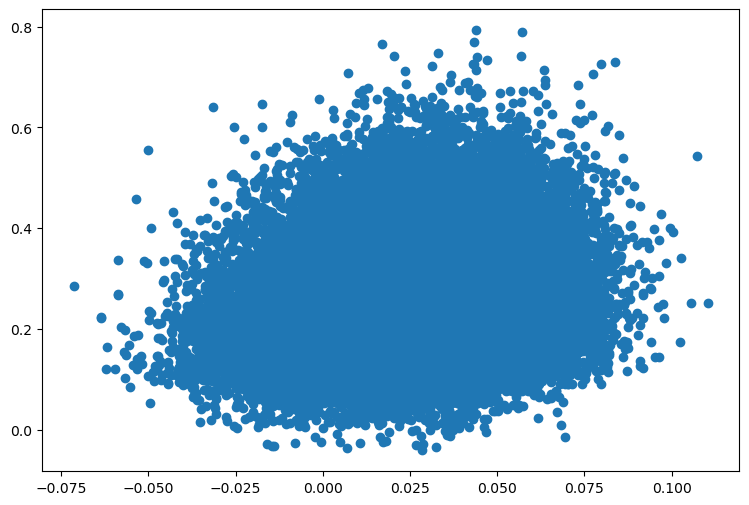

In [154]:
best_ising_fc_triu = best_ising_fc[triu_row, triu_col]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.scatter( best_ising_fc_triu.detach().cpu().numpy(), J_triu.detach().cpu().numpy() )
print(   torch.corrcoef(  torch.stack( (best_ising_fc_triu, J_triu), dim=0 )  )   )

In [172]:
# beta_test_ts_file_3 = os.path.join(results_dir, f'third_time_series_beta_test_from_expected_group_{data_subset}_threshold_{threshold_str}_parallel_21_updates_0_sim_length_12000_learning_rate_0.pt')
beta_test_ts_file_3 = os.path.join(results_dir, f'fourth_time_series_beta_test_from_expected_group_{data_subset}_threshold_{threshold_str}_parallel_21_updates_0_sim_length_36000_learning_rate_0.pt')
beta_test_ts_3 = torch.load(beta_test_ts_file_3)
print( beta_test_ts_3.size() )

torch.Size([21, 360, 36000])


In [173]:
# beta_3 = [0.02,   0.019,  0.018,  0.017,  0.016,  0.015,  0.014,  0.013,  0.012,  0.011,  0.01,   0.0099, 0.0098, 0.0097, 0.0096, 0.0095, 0.0094, 0.0093, 0.0092, 0.0091, 0.009]
beta_3 = [0.0130, 0.0129, 0.0128, 0.0127, 0.0126, 0.0125, 0.0124, 0.0123, 0.0122, 0.0121, 0.0120, 0.0119, 0.0118, 0.0117, 0.0116, 0.0115, 0.0114, 0.0113, 0.0112, 0.0111, 0.0110]
mean_beta_test_ts_3 = beta_test_ts_3.mean(dim=1)
mean_beta_test_ts_sign_3 = mean_beta_test_ts_3.sign()
mean_beta_test_ts_is_zero_crossing_3 = mean_beta_test_ts_sign_3[:,:-1] != mean_beta_test_ts_sign_3[:,1:]
mean_beta_test_ts_num_zero_crossings_3 = mean_beta_test_ts_is_zero_crossing_3.count_nonzero(dim=-1)
print(mean_beta_test_ts_num_zero_crossings_3)

tensor([   1,   11,    6,   29,   21,   57,  127,  211,  304,  500,  653,  840,
        1222, 1603, 2088, 2662, 3260, 3782, 4795, 5023, 6059], device='cuda:0')


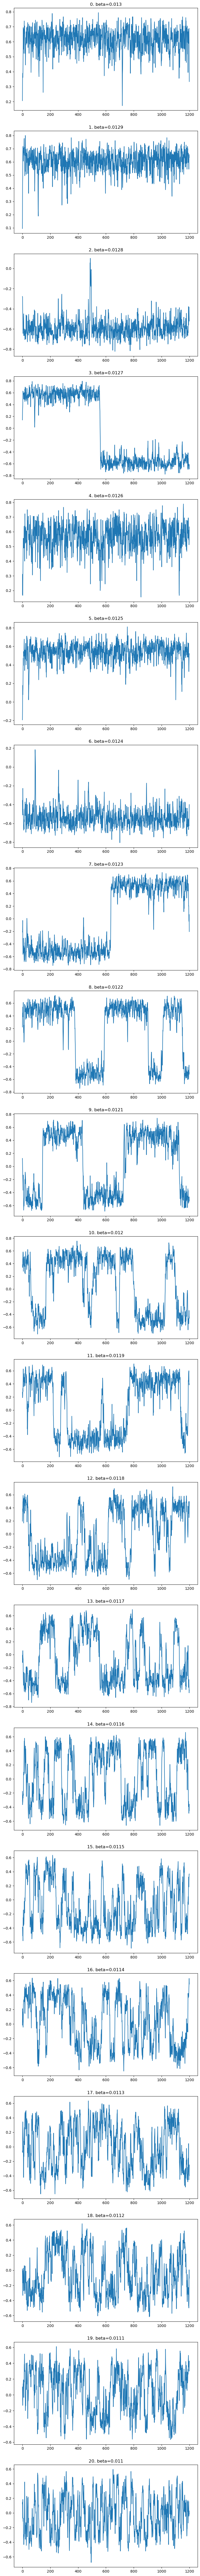

In [177]:
num_betas_3 = len(beta_3)
fig, axs = plt.subplots(nrows=num_betas_3, ncols=1, figsize=(9, 6*num_betas_3))
for beta_index in range(num_betas_3):
    axs[beta_index].plot( mean_beta_test_ts_3[beta_index,:1200].detach().cpu().numpy(), label=f'beta={beta_3[beta_index]:.3g}' )
    axs[beta_index].set_title(f'{beta_index}. beta={beta_3[beta_index]}')
# axs.legend()
# axs.set_xlabel('time step')
# axs.set_ylabel('mean of region states')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
plt.show()

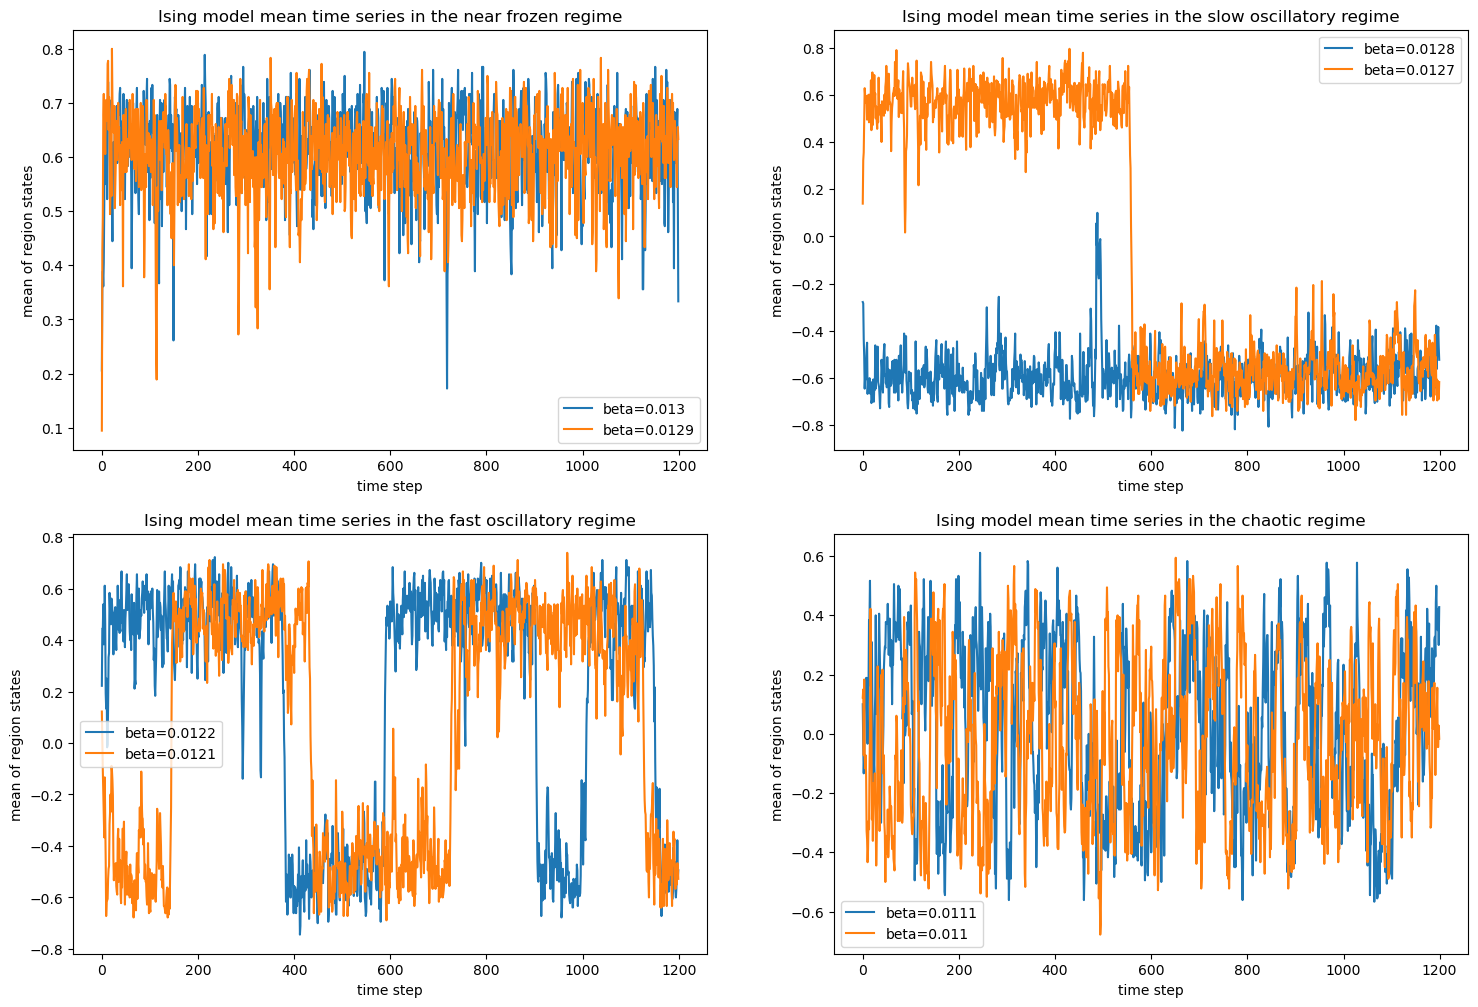

In [179]:
fig, axs = plt.subplots( nrows=2, ncols=2, figsize=(18, 12) )

num_time_points_to_plot = 1200

rows = [0, 0, 1, 1]
cols = [0, 1, 0, 1]
# beta_index_pairs = [[6, 7], [8, 9], [10, 11], [19, 20]]
beta_index_pairs = [[0, 1], [2, 3], [8, 9], [19, 20]]
regime_names = ['near frozen', 'slow oscillatory', 'fast oscillatory', 'chaotic']
for plot_row, plot_col, beta_index_pair, regime_name in zip(rows, cols, beta_index_pairs, regime_names):
    for beta_index in beta_index_pair:
        axs[plot_row,plot_col].plot( mean_beta_test_ts_3[beta_index,:num_time_points_to_plot].detach().cpu().numpy(), label=f'beta={beta_3[beta_index]:.3g}' )
    axs[plot_row,plot_col].legend()
    axs[plot_row,plot_col].set_xlabel('time step')
    axs[plot_row,plot_col].set_ylabel('mean of region states')
    axs[plot_row,plot_col].set_title(f'Ising model mean time series in the {regime_name} regime')
plt.show()

0.0122
torch.Size([360, 36000])


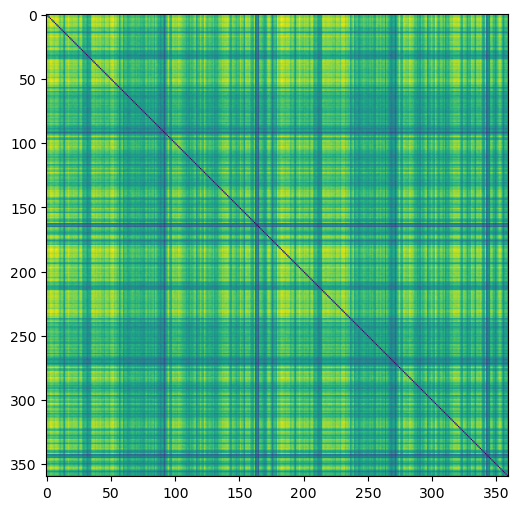

In [180]:
best_ising_index = 8
print(beta_3[best_ising_index])
best_ising_ts = beta_test_ts_3[best_ising_index,:,:]
print( best_ising_ts.size() )
centered_ts = best_ising_ts - torch.mean(best_ising_ts, dim=-1, keepdim=True)
num_time_points_best = centered_ts.size(dim=-1)
ts_std = torch.sqrt(  torch.sum( torch.square(centered_ts), dim=-1 )/(num_time_points_best - 1)  )
best_ising_cov = torch.zeros( (num_nodes, num_nodes), dtype=float_type, device=device )
for t in range(num_time_points_best):
    best_ising_cov += centered_ts[:,None,t] * centered_ts[None,:,t]
best_ising_fc = ( best_ising_cov/num_time_points_best )/( ts_std[:,None] * ts_std[None,:] )
best_ising_fc_no_diag = best_ising_fc - torch.diag_embed( torch.diagonal(best_ising_fc) )
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.imshow( best_ising_fc_no_diag.detach().cpu().numpy() )

tensor([[1.0000, 0.5979],
        [0.5979, 1.0000]], device='cuda:0')


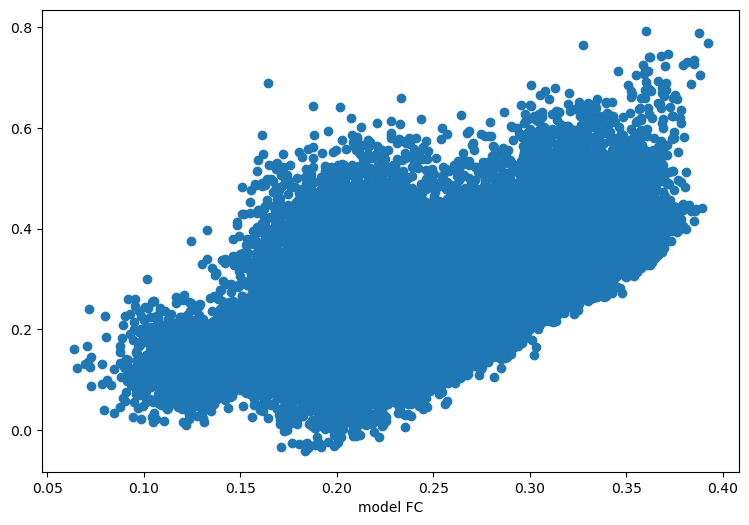

In [181]:
best_ising_fc_triu = best_ising_fc[triu_row, triu_col]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.scatter( best_ising_fc_triu.detach().cpu().numpy(), J_triu.detach().cpu().numpy() )
axs.set_ylabel('data FC')
axs.set_xlabel('model FC')
print(   torch.corrcoef(  torch.stack( (best_ising_fc_triu, J_triu), dim=0 )  )   )

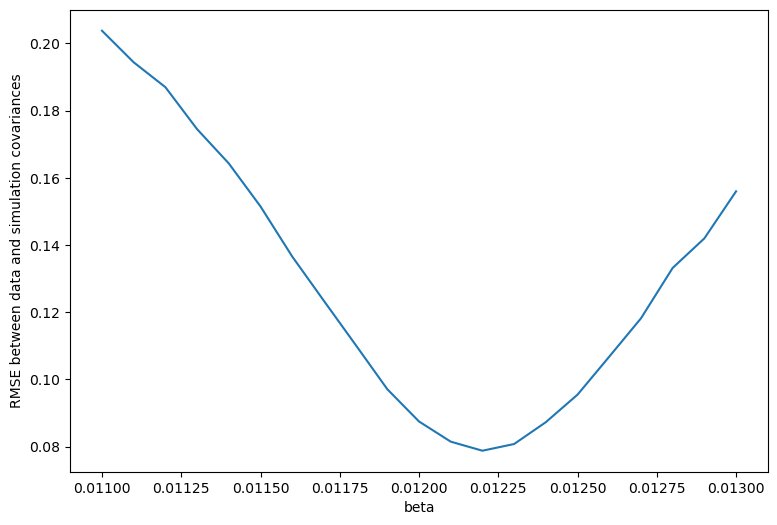

In [182]:
# rmse_3 = [0.6067, 0.5762, 0.5389, 0.4923, 0.4349, 0.3627, 0.2742, 0.1564, 0.0883, 0.2004, 0.2446, 0.2473, 0.2485, 0.2501, 0.2514, 0.2525, 0.2535, 0.2546, 0.2551, 0.2562, 0.2567]
rmse_3 = [0.1560, 0.1420, 0.1332, 0.1182, 0.1068, 0.0955, 0.0873, 0.0808, 0.0788, 0.0815, 0.0875, 0.0971, 0.1103, 0.1234, 0.1366, 0.1515, 0.1643, 0.1745, 0.1870, 0.1944, 0.2038]
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot( beta_3, rmse_3 )
axs.set_xlabel('beta')
axs.set_ylabel('RMSE between data and simulation covariances')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
plt.show()

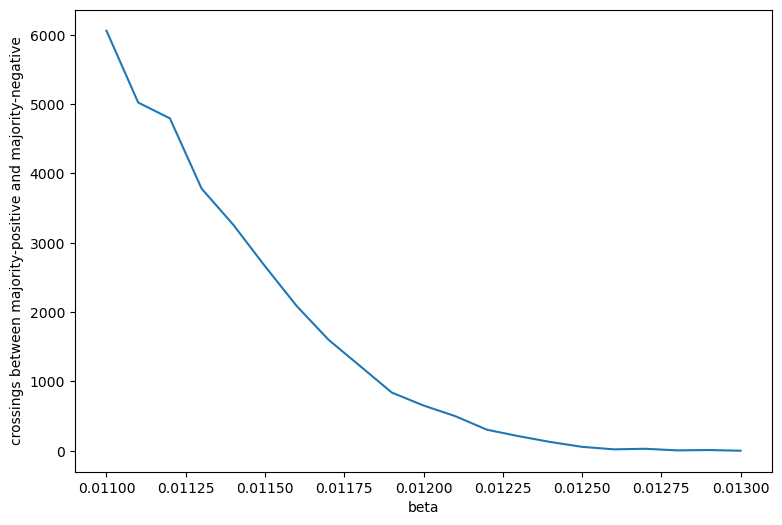

In [183]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.plot( beta_3, mean_beta_test_ts_num_zero_crossings_3.tolist() )
axs.set_xlabel('beta')
axs.set_ylabel('crossings between majority-positive and majority-negative')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
plt.show()

In [12]:
mean_state_group_training_file = os.path.join(results_dir, f'mean_state_group_training.pt')
mean_state_group_training = torch.load(mean_state_group_training_file)
print( mean_state_group_training.size() )

torch.Size([1, 360])


In [18]:
flip_counts_file = os.path.join(results_dir, 'flip_number_counts__training.pt')
flip_counts = torch.load(flip_counts_file)
print(flip_counts)

tensor([ 22401,  29987,  35215,  39428,  44808,  50436,  57159,  64899,  73833,
         83285,  94241, 105218, 114801, 124144, 131460, 136904, 140772, 141437,
        140464, 137460, 131829, 126215, 118561, 110864, 101962,  93301,  84923,
         76626,  68685,  61081,  54394,  47682,  42127,  37384,  32767,  29047,
         25433,  22116,  19698,  17231,  15189,  13298,  11913,  10503,   9260,
          8293,   7313,   6444,   5559,   5186,   4476,   3996,   3666,   3230,
          2883,   2564,   2225,   2017,   1902,   1615,   1531,   1361,   1196,
          1080,    966,    857,    743,    725,    623,    553,    505,    450,
           377,    369,    283,    281,    245,    237,    190,    184,    173,
           159,    131,    129,     86,    119,    101,     94,     76,     61,
            60,     45,     54,     46,     39,     40,     35,     43,     30,
            34,     33,     28,     16,     26,     22,     24,     20,     28,
            24,     16,     20,     28, 

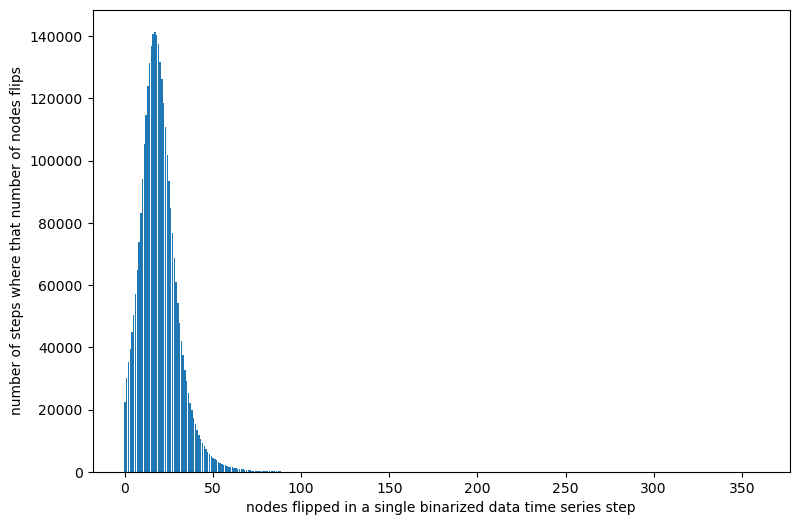

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.bar(  x=range( flip_counts.numel() ), height=flip_counts.tolist()  )
axs.set_xlabel('nodes flipped in a single binarized data time series step')
axs.set_ylabel('number of steps where that number of nodes flips')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
plt.show()

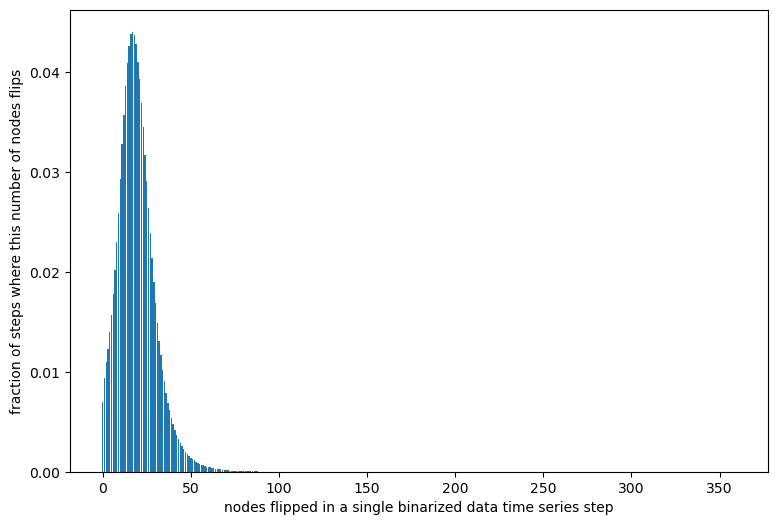

In [21]:
flip_freq = flip_counts/flip_counts.sum()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.bar(  x=range( flip_counts.numel() ), height=flip_freq.tolist()  )
axs.set_xlabel('nodes flipped in a single binarized data time series step')
axs.set_ylabel('fraction of steps where this number of nodes flips')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
plt.show()

In [23]:
most_common_num_flipped = torch.argmax(flip_freq)
max_flip_freq = flip_freq[most_common_num_flipped]
print(f'The most common number of nodes flipped is {most_common_num_flipped} with frequency {max_flip_freq:.3g}.')

The most common number of nodes flipped is 17 with frequency 0.0441.


In [24]:
# Try fitting a binomial distribution to the data.
# See http://www-stat.wharton.upenn.edu/~tcai/paper/Binomial-StatSci.pdf
num_nodes = flip_counts.numel()
num_steps = flip_counts.sum()
max_possible_flips = num_nodes * num_steps
num_flips = torch.arange(num_nodes, dtype=torch.int, device=device)
total_num_flips = torch.sum(num_flips * flip_counts)
flip_probability = total_num_flips/max_possible_flips
print(f'If we assume all flips are independent, the probability of a given node flipping on a given trial is {flip_probability:.3g}.')

If we assume all flips are independent, the probability of a given node flipping on a given trial is 0.0543.


In [42]:
flip_probability = torch.tensor([0.0475], dtype=float_type, device=device)
num_flips = torch.arange(num_nodes, dtype=torch.int, device=device)
max_possible_flips = torch.full_like(input=num_flips, fill_value=num_nodes)
# from https://discuss.pytorch.org/t/n-choose-k-function/121974/3
log_n_take_k = ( (max_possible_flips + 1).lgamma() - (num_flips + 1).lgamma() - ((max_possible_flips - num_flips) + 1).lgamma() )# .exp()
# exp( log(p)*k ) = e^( log(p)*k ) = ( e^log(p) )^k = p^k
log_p_to_the_k = ( flip_probability.log() * num_flips )# .exp()
log_q_to_the_n_minus_k = ( (1 - flip_probability).log() * (max_possible_flips - num_flips) )# .exp()
log_bdist = log_n_take_k + log_p_to_the_k + log_q_to_the_n_minus_k
bdist = log_bdist.exp()
most_common_num_flipped_bdist = torch.argmax(bdist)
max_flip_freq_bdist = bdist[most_common_num_flipped_bdist]
print(f'For a binomial distribution with p={flip_probability.item():.3g}, the most common number of nodes flipped is {most_common_num_flipped_bdist} with frequency {max_flip_freq_bdist:.3g}.')

torch.Size([360])
For a binomial distribution with p=0.0475, the most common number of nodes flipped is 17 with frequency 0.0986.


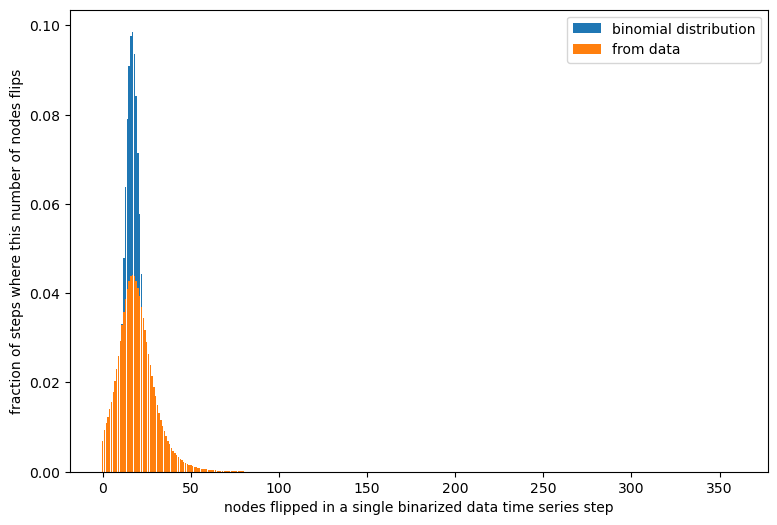

In [43]:
flip_freq = flip_counts/flip_counts.sum()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.bar(  x=range( bdist.numel() ), height=bdist.tolist(), label='binomial distribution'  )
axs.bar(  x=range( flip_counts.numel() ), height=flip_freq.tolist(), label='from data'  )
axs.set_xlabel('nodes flipped in a single binarized data time series step')
axs.set_ylabel('fraction of steps where this number of nodes flips')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
axs.legend()
plt.show()

In [161]:
alpha = torch.tensor([4.432215743440233], dtype=float_type, device=device)
beta = torch.tensor([70.25], dtype=float_type, device=device)
num_flips = torch.arange(num_nodes, dtype=torch.int, device=device)
fraction_flipped = num_flips/num_nodes
log_betafun = (alpha + beta).lgamma() - alpha.lgamma() - beta.lgamma() + (alpha-1)*fraction_flipped.log() + (beta-1)*(1 - fraction_flipped).log()
betafun = log_betafun.exp()
betafun_prob = betafun/torch.sum(betafun)
most_common_num_flipped_betafun = torch.argmax(betafun_prob)
max_flip_freq_betafun = betafun_prob[most_common_num_flipped_betafun]
print(f'For a beta distribution with alpha={alpha.item():.3g} and beta={beta.item():.3g}, the most common number of nodes flipped is {most_common_num_flipped_betafun} with frequency {max_flip_freq_betafun:.3g}.')

For a beta distribution with alpha=4.43 and beta=70.2, the most common number of nodes flipped is 17 with frequency 0.0441.


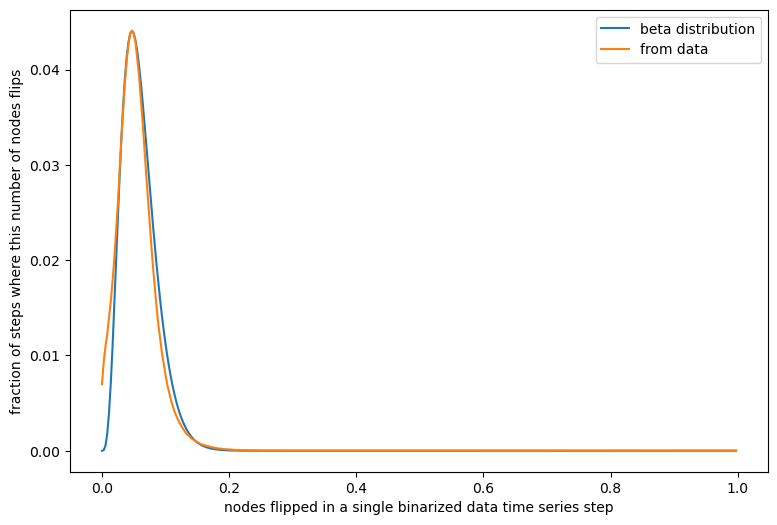

In [162]:
flip_freq = flip_counts/flip_counts.sum()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
# axs.bar(  x=fraction_flipped.tolist(), height=betafun.tolist(), label='beta distribution'  )
# axs.bar(  x=fraction_flipped.tolist(), height=flip_freq.tolist(), label='from data'  )
axs.plot( fraction_flipped.tolist(), betafun_prob.tolist(), label='beta distribution'  )
axs.plot( fraction_flipped.tolist(), flip_freq.tolist(), label='from data'  )
axs.set_xlabel('nodes flipped in a single binarized data time series step')
axs.set_ylabel('fraction of steps where this number of nodes flips')
# axs.set_title(f'Ising model mean time series with same parameters and different beta')
axs.legend()
plt.show()

In [160]:
b = 70.25
a = (17*b + 326)/343
print(f'if b={b}, then a={a}')

if b=70.25, then a=4.432215743440233


In [163]:
state_counts_file = os.path.join(results_dir, 'unique_state_counts__training.pt')
state_counts = torch.load(state_counts_file)
print( state_counts.size() )

torch.Size([3181055])


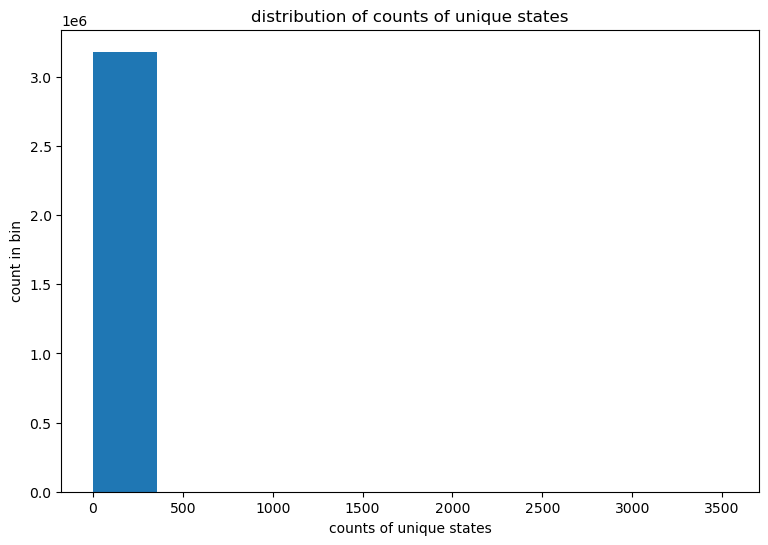

The distribution of counts of unique states values has median 1 with 95% CI [1, 1] and range [1, 3.53e+03].


In [171]:
make_histogram(name='counts of unique states', values=state_counts)
print_stats( name='counts of unique states', values=state_counts.float() )

In [174]:
count_all_down = state_counts[0].item()
count_total = state_counts.sum().item()
print( count_all_down, count_total, count_all_down/count_total)

3528 3211200 0.0010986547085201793


In [181]:
print( torch.count_nonzero(state_counts >= 360) )

tensor(5, device='cuda:0')


In [187]:
test_previous_state = -torch.ones( (360,), dtype=float_type, device=device )
test_current_state = -torch.ones( (360,), dtype=float_type, device=device )
test_current_state[5] = 1
test_current_state[100] = 1
is_flipped = test_current_state != test_previous_state
num_flipped = torch.count_nonzero(is_flipped)
print(num_flipped)
test_state_transition_counts = torch.zeros( (360,), dtype=float_type, device=device )
test_state_transition_counts[is_flipped] += 1/num_flipped
print(test_state_transition_counts)

tensor(2, device='cuda:0')
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.000